# Implementing a two layer neural network classifier over MNIST
---

I have tried to implement a hard coded model, with two hidden layers. However, I could not process the MNIST dataset to train the model as instructed in the provided task, under the given timeframe. <p>
I could not successfully intertwine the cost function and implement a backpropagation algorothm for the main model that was to be trained on the MNIST dataset.<p>
Below is a partially executed task on my part, and I am hereby submitting what I could come up with in the given timeframe.

# Three Layer Hard Coded Model

In [1]:
import numpy as np
import jax.numpy as jnp
import numpy.random as npr
import matplotlib.pyplot as plt

In [2]:
X = np.array([[0, 0, 0],
              [0, 0, 1],
              [0, 1, 0],
              [0, 1, 1],
              [1, 0, 0],
              [1, 0, 1],
              [1, 1, 0],
              [1, 1, 1]])

In [3]:
y = np.array([[0], [1], [0], [1], [0], [1], [1], [1]])

In [4]:
#
inputs = 3
hidden1 = 4
hidden2 = 4
outputs = 1

In [5]:
#
W1 = np.random.randn(inputs, hidden1)
b1 = np.ones((1, hidden1))

W2 = np.random.randn(hidden1, hidden2)
b2 = np.ones((1, hidden2))

W3 = np.random.randn(hidden2, outputs)
b3 = np.ones((1, outputs))

In [6]:
a1 = np.dot(X, W1) + b1
print(a1)
print(np.dot(X, W1))

[[ 1.          1.          1.          1.        ]
 [ 0.16887524  1.05868077 -0.80529245  0.41213063]
 [ 2.9746596  -0.13954552  1.6780814   0.95752552]
 [ 2.14353483 -0.08086475 -0.12721104  0.36965615]
 [ 1.40519882  0.75577258  0.97426676  0.28186825]
 [ 0.57407406  0.81445335 -0.83102569 -0.30600112]
 [ 3.37985841 -0.38377295  1.65234816  0.23939376]
 [ 2.54873365 -0.32509218 -0.15294428 -0.34847561]]
[[ 0.          0.          0.          0.        ]
 [-0.83112476  0.05868077 -1.80529245 -0.58786937]
 [ 1.9746596  -1.13954552  0.6780814  -0.04247448]
 [ 1.14353483 -1.08086475 -1.12721104 -0.63034385]
 [ 0.40519882 -0.24422742 -0.02573324 -0.71813175]
 [-0.42592594 -0.18554665 -1.83102569 -1.30600112]
 [ 2.37985841 -1.38377295  0.65234816 -0.76060624]
 [ 1.54873365 -1.32509218 -1.15294428 -1.34847561]]


In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
#
def forward_propagation(W1, W2, W3):
    a1 = np.dot(X, W1) + b1
    z1 = sigmoid(a1)

    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)

    a3 = np.dot(z2, W3) + b3
    y_pred = sigmoid(a3)
    return a1, z1, a2, z2, a3, y_pred

In [9]:
def compute_cost(y_pred):
    J = 0.5 * sum((y - y_pred) ** 2)
    return J

In [10]:
def sigmoid_derivative(x):
    return np.exp(-x) / ((1 + np.exp(-x)) ** 2)

In [11]:
#
def backward_propagation(y_pred, z3, a2, z2, a1, z1):
    delta3 = np.multiply(-(y - y_pred), sigmoid_derivative(z3))
    dJ_dW3 = np.dot(a2.T, delta3)

    delta2 = np.dot(delta3, W3.T) * sigmoid_derivative(z2)
    dJ_dW2 = np.dot(a1.T, delta2)

    delta1 = np.dot(delta2, W2.T) * sigmoid_derivative(z1)
    dJ_dW1 = np.dot(X.T, delta1)

    return dJ_dW1, dJ_dW2, dJ_dW3

In [12]:
#
alpha = 0.01
num_iterations = 10000
cost=[]
for i in range(num_iterations):
    z1, a1, z2, a2, z3,  y_pred = forward_propagation(W1, W2, W3)
    dJ_dW1, dJ_dW2, dJ_dW3 = backward_propagation(y_pred, z3, a2, z2, a1, z1)

    W1 = W1 - (alpha * dJ_dW1)
    W2 = W2 - (alpha * dJ_dW2)
    W3 = W3 - (alpha * dJ_dW3)

    c = compute_cost(y_pred)
    cost.append(c)

Text(0, 0.5, 'Loss')

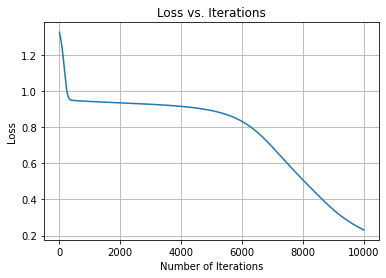

In [13]:
plt.grid() 
plt.plot(range(num_iterations), cost)
plt.title('Loss vs. Iterations') 
plt.xlabel('Number of Iterations') 
plt.ylabel('Loss')

### **Main Model Implementation**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

#import os
#print(os.listdir("../input"))

from keras.datasets import mnist
from keras.utils import np_utils

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 1, 28*28)
x_train = x_train.astype('float32')
x_train /= 255
y_train = np_utils.to_categorical(y_train)

In [ ]:
x_test = x_test.reshape(x_test.shape[0], 1, 28*28)
x_test = x_test.astype('float32')
x_test /= 255
y_test = np_utils.to_categorical(y_test)

In [ ]:
print('training_data shape: ', x_train.shape)
print('testing data shape : ', x_test.shape)

training_data shape:  (60000, 1, 784)
testing data shape :  (10000, 1, 784)


In [ ]:
y_train.shape

(60000, 10)

In [ ]:
print("Training Data shape   :",x_train.shape)
print('Training Label shape  :', y_train.shape)
print("Testing Data shape    :",x_test.shape)

Training Data shape   : (60000, 1, 784)
Training Label shape  : (60000, 10)
Testing Data shape    : (10000, 1, 784)


In [ ]:
n_x = 784 
n_h1 = 64 
n_h2 = 64
n_y = 10

learning_rate = 0.05

In [ ]:
def compute_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [ ]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

def sigmoid_prime(x):
     return sigmoid(x)*(1-sigmoid(x))

In [ ]:
W1 = np.random.randn(n_h1, n_x)
b1 = np.zeros((n_h1,1))
    
W2 = np.random.randn(n_h2, n_h1)
b2 = np.zeros((n_h2,1))

W3 = np.random.randn(n_y, n_h2)
b3 = np.zeros((n_y,1))

#     params = {'W1':W1, 'W2': W2, 'b1':b1, 'b2':b2}
    
#     return params

print('W1:',W1.shape)
print('b1:',b1.shape)
print('\nW2:',W2.shape)
print('b2:',b2.shape)
print('\nW3:',W3.shape)
print('b3:',b3.shape)

W1: (64, 784)
b1: (64, 1)

W2: (64, 64)
b2: (64, 1)

W3: (10, 64)
b3: (10, 1)
